#**Multiple Linear Regression**



###**Sebastian Ezequiel Coronado Rivera**



**NOTES:**

* Only the "california_housing_train.csv" file will be used.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# We upload the file that is in the following Google-Colab folder:
DIR = "/content/sample_data/"
os.chdir(DIR)

mydata = pd.read_csv("california_housing_train.csv", sep=",")
mydata.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#**Exercise - 1: Pearson Correlation Matrix**

**QUESTIONS:**

* **Question 1.1.** Investigate the importance of the Pearson correlation coefficient and how it can be used when analyzing data in a problem.

* **Question 1.2.** What types of variables can we apply the Pearson correlation coefficient to?

* **Question 1.3.** Display the correlation matrix for the variables in the "mydata" data frame, including the numerical correlation value between each pair of variables in each cell of the matrix. When displaying the correlation matrix, you must also use the heatmap option in the seaborn library, using the 'BuGn' color map.

You can consult the following documentation:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html


### **Answers:**

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

* **Answer 1.1.**
The coefficient is important because it tells us whether two variables tend to vary proportionally or inversely. In other words, it quantifies the direction and strength of the linear relationship between two variables. Its importance lies in its ability to identify relationships and, if they exist, to quantify the strength of that relationship. This, in turn, allows for the construction of models, facilitating the selection of the most relevant variables in an analysis and thus validating established hypotheses.

* **Answer 1.2.**
The coefficient is specifically applied to continuous quantitative variables, that is, variables that must be numerical and have a continuous scale.
For the measurement of the relationship between variables to be valid, they must have a linear relationship with each other and must have an approximately normal distribution.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

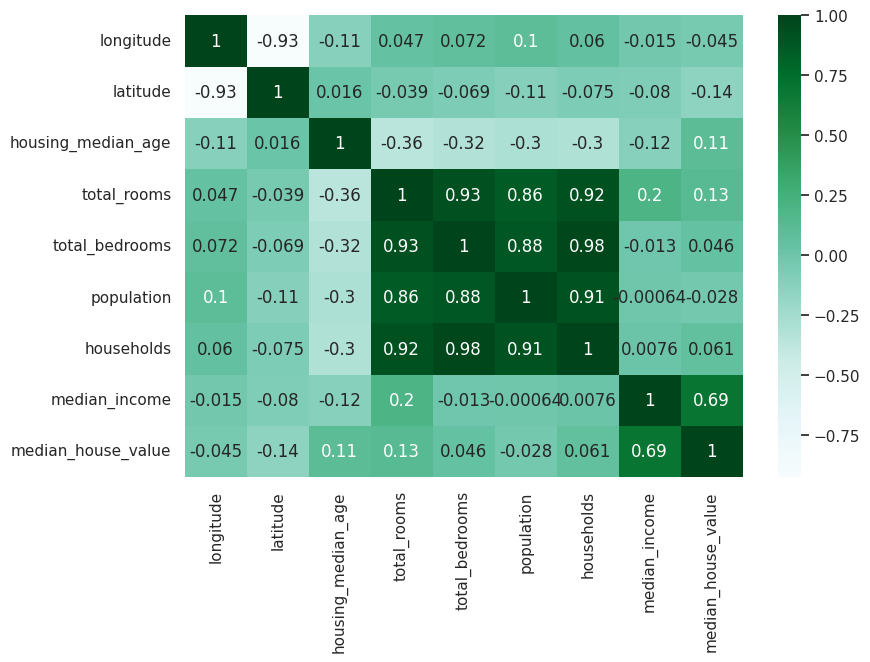

In [3]:
sns.set(rc={'figure.figsize':(9,6)})

# Answer 1.3.

mydata_corrmtx = mydata.corr()
sns.heatmap(mydata_corrmtx, annot=True, cmap='BuGn')



plt.show()

#**Exercise - 2: Variables Transformations and Histograms**

**INSTRUCTIONS:**

In this exercise, you will work with only the following 7 variables:

*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value

You must apply the following transformations to each of these variables and display their histograms with 20 bars (bins):

* Square root with Numpy.
* Natural logarithm with Numpy.
* Power of 2 (i.e., squaring) with Numpy.
* Investigate and apply Box-Cox with scikit-learn.


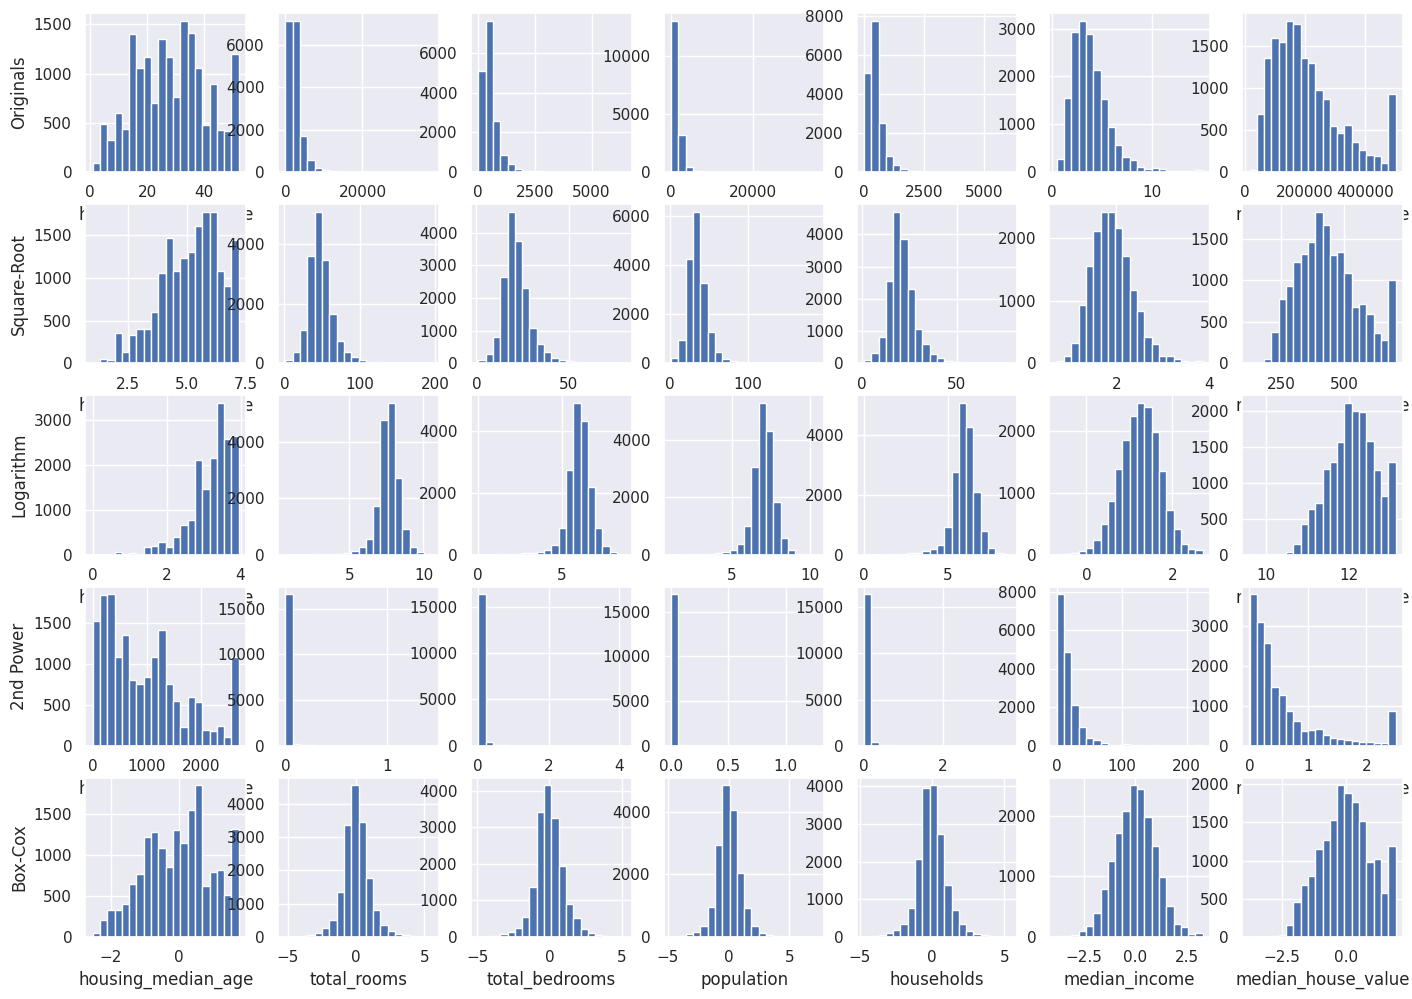

In [4]:
# List the names of the 7 variables that we will work on in this exercise.
variables_to_transform = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 7)

for k in range(0,7):

    ################################################################################################################
    # Exercise 2
    # You should only write your code in the sections marked "None," replacing it with your own code.
    # You should use the "mydata" dataframe with the list we call "variables_to_transform" to
    # select the values ​​for each of the 7 variables that will be transformed and graphed.


    # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1)

    Transf0 = mydata[variables_to_transform[k]] # In this line, assign the untransformed values ​​of each variable "k" to Transf0.

    plt.hist(Transf0, bins=20) # In this line, add the command to obtain the histogram of Transf0 with 20 bars (bins).



    plt.xlabel(variables_to_transform[k])
    if k==0:
      plt.ylabel('Originals')



    # Square-root transformed data ------------------------------------
    plt.subplot(5,7,k+8)

    Transf1 = np.sqrt(Transf0) # In this line, the square root should be applied to the untransformed values ​​of each variable "k".

    plt.hist(Transf1, bins=20) # In this line, add the command to obtain the histogram of Transf1 with 20 bars (bins).



    plt.xlabel(variables_to_transform[k])
    if k==0:
      plt.ylabel('Square-Root')



    # Data transformed with natural logarithm --------------------------------
    plt.subplot(5,7,k+15)

    Transf2 = np.log(Transf0) # In this line, apply the natural logarithm to the untransformed values ​​of each variable "k".

    plt.hist(Transf2, bins=20) # In this line, add the command to obtain the Transf2 histogram with 20 bars (bins).

    plt.xlabel(variables_to_transform[k])
    if k==0:
      plt.ylabel('Logarithm')



    # Data transformed to the 2nd Power ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.square(Transf0) # In this line, you must square the values ​​of each untransformed variable "k".

    plt.hist(Transf3, bins=20) # In this line, add the command to obtain the Transf3 histogram with 20 bars (bins).

    plt.xlabel(variables_to_transform[k])
    if k==0:
      plt.ylabel('2nd Power')


    # Box-Cox transformed data ------------------------------------------
    plt.subplot(5,7,k+29)

    Transf4 = power_transform(X=(Transf0.to_numpy()).reshape(-1,1),method='box-cox') # In this line, the Box-Cox transformation should be applied to the values ​​of each untransformed variable "k".

    plt.hist(Transf4, bins=20) # In this line, add the command to obtain the Transf4 histogram with 20 bars (bins).



    plt.xlabel(variables_to_transform[k])
    if k==0:
      plt.ylabel('Box-Cox')

    ################################################################################################################



plt.show()

#**Exercise - 3 - Performance metrics: $RMSE$, $MAE$ and $MAPE$**



**INSTRUCTIONS:**

Investigate the meaning of the formulas that define the metrics $RMSE$, $MAE$, and $MAPE$.

Each of them can be calculated using the actual observed values ​​$y$, the predicted values ​​$\hat{y}$, and the total number of records $n$.

In this exercise, you must define each of these metrics using three functions that you will call my_RMSE, my_MAE, and my_MAPE.

Each of the three functions you define must have two arguments: the actual observed values ​​$y$ and the predicted values ​​$\hat{y}$.

The return value must be the actual numerical value given by the formula that defines it.

You can only use the NumPy functions mean, square, and absolute value, in addition to basic arithmetic operations.


In [ ]:
#########################################################################
# Exercise 3

# Include the lines of code that define the mi_RMSE function here:
def mi_RMSE(y, y_hat):

  return (np.mean(np.square(y - y_hat)))**0.5


# Include here the lines of code that define the mi_MAE function:
def mi_MAE(y, y_hat):

  return np.mean(np.abs(y - y_hat))


# Include here the lines of code that define the mi_MAPE function:
def mi_MAPE(y, y_hat):

  return np.mean(np.abs((y - y_hat) / y))*100

#########################################################################



In [ ]:
Xtrain = mydata.drop('median_house_value', axis='columns')
ytrain = mydata['median_house_value']

num_prepro_pipeline = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')),
                                        ('scaler', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])

numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']

columnsTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder='passthrough')



modelo_LR = LinearRegression()

scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

kf = KFold(n_splits= 10, shuffle=True)

for train_index, val_index in kf.split(Xtrain):

  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  XtrainFit = columnsTransformer.fit(X_train)
  XtrainTransf = XtrainFit.transform(X_train)

  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)


  XvalTransf = XtrainFit.transform(X_val)
  yhatVal = modelo_LR.predict(XvalTransf)

  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Display information:
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

print("\t  %s\t\t%s   \t\t%s" % (names[0],names[1],names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

	  RMSEval		MAEval   		MAPEval
fold[1]:  69828.6 		50038.6  		29.4%
fold[2]:  67983.3 		50398.8  		30.0%
fold[3]:  66599.8 		49626.4  		29.5%
fold[4]:  69186.9 		50300.1  		29.9%
fold[5]:  68129.7 		49835.9  		29.8%
fold[6]:  69041.3 		51183.9  		30.6%
fold[7]:  70828.2 		51326.0  		30.7%
fold[8]:  71378.2 		51971.6  		31.1%
fold[9]:  66821.4 		50144.2  		29.9%
fold[10]:  70644.1 		52006.8  		31.1%
mean(std) 69044.2(1571.7)  	50683.2(827.3)   	30.2% (0.6)


# Conclusions:

Correlation Insights: The Pearson correlation analysis in Part 1 provided valuable initial insights into the linear relationships between the housing features. Strong positive correlations (e.g., between room-related variables and households, and between median income and median house value) and a strong negative correlation between latitude and longitude align with general expectations about housing characteristics and geography in California. This step helps in understanding the data's structure and potential predictors.

Impact of Transformations: Part 2 demonstrated the significant impact of different data transformations on the distribution of the variables. Logarithmic and Box-Cox transformations were effective in reducing the right skewness observed in many of the original features, potentially making them more suitable for linear models or statistical analyses that assume normality. Squaring, on the other hand, increased skewness. The choice of transformation is crucial for meeting the assumptions of certain models and can influence their performance.

Linear Model Limitations: The results from Part 3, using a linear regression model with basic preprocessing, show a considerable level of prediction error (mean RMSE of approximately $69,044 and a mean MAPE of around 30.2%). This suggests that a simple linear model might not be sufficient to capture the complex relationships that determine housing prices in this dataset.

Importance of Evaluation Metrics: The exercise highlighted the importance of using appropriate performance metrics like RMSE, MAE, and MAPE to quantify and understand the errors of a regression model. These metrics provide different perspectives on the model's accuracy, with RMSE being more sensitive to large errors, MAE providing the average absolute error, and MAPE offering a relative error measure.

Need for Model Improvement: The relatively high error metrics indicate a need for exploring more sophisticated modeling techniques or further feature engineering to improve prediction accuracy. Non-linear models, interaction terms, or dimensionality reduction techniques could potentially capture more of the underlying variance in the housing prices.

Cross-Validation Robustness: The use of 10-fold cross-validation provides a more robust estimate of the model's generalization performance by evaluating it on multiple independent subsets of the data. The consistency of the error metrics across the folds (as indicated by the relatively small standard deviations compared to the means) gives more confidence in the overall assessment of the model's performance.

In summary, this activity provided a comprehensive overview of essential steps in a data analysis and modeling workflow: understanding variable relationships through correlation, preprocessing data using transformations, building a predictive model, and evaluating its performance using appropriate metrics and cross-validation. The results suggest that while initial preprocessing steps were applied, a simple linear regression model might not be the most effective for this particular prediction task, indicating the potential benefit of exploring more advanced modeling techniques.


**\<\<Fin de la Actividad_1_Semana_2>>**